In [ ]:
import os
os.listdir('/content')

['.config', 'Window_5-S0.zip', 'sample_data']

In [ ]:
!unzip Window_5_S0.zip -d /content/

Archive:  Window_5_S0.zip
replace /content/Window_5/data.joblib? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Window_5/data.joblib  


In [ ]:
import os
os.path.exists('/content/Window_5_S0/data.joblib')

True

In [ ]:
from google.colab import files
files.upload()

Saving Window_5-S7.zip to Window_5-S7.zip


In [9]:
import os
os.listdir('/content')

['.config',
 'Window_5-S7.zip',
 'Window_5_S0.zip',
 'Window_5_S0',
 '.ipynb_checkpoints',
 'sample_data']

In [10]:
!unzip Window_5-S7.zip -d /content/Window_5_tmp

Archive:  Window_5-S7.zip
  inflating: /content/Window_5_tmp/Window_5/data.joblib  


In [11]:
import os
os.listdir('/content/Window_5_tmp')

['Window_5']

In [12]:
!mv /content/Window_5_tmp/Window_5 /content/Window_5_S7

In [13]:
import os
os.path.exists('/content/Window_5_S7/data.joblib')

True

In [14]:
!rm -rf /content/Window_5_tmp

In [15]:
import os
os.listdir('/content')

['.config',
 'Window_5-S7.zip',
 'Window_5_S7',
 'Window_5_S0.zip',
 'Window_5_S0',
 '.ipynb_checkpoints',
 'sample_data']

In [16]:
import joblib

data_S0 = joblib.load('/content/Window_5_S0/data.joblib')
data_S7 = joblib.load('/content/Window_5_S7/data.joblib')

type(data_S0), type(data_S7)

(dict, dict)

In [17]:
data_S0.keys(), data_S7.keys()

(dict_keys(['X', 'y', 'Px_list', 'Py_list', 'com_grid', 'full_image', 'Px_full', 'Py_full', 'ab_x_full', 'ab_y_full']),
 dict_keys(['X', 'y', 'Px_list', 'Py_list', 'com_grid', 'full_image', 'Px_full', 'Py_full', 'ab_x_full', 'ab_y_full']))

In [18]:
data_S0['X'].shape, data_S7['X'].shape

((4094527, 5, 5, 1), (4521972, 5, 5, 1))

Flatten data

In [19]:
import numpy as np

X_S0 = data_S0['X'].reshape(data_S0['X'].shape[0], -1)
X_S7 = data_S7['X'].reshape(data_S7['X'].shape[0], -1)

X_S0.shape, X_S7.shape

((4094527, 25), (4521972, 25))

In [20]:
import numpy as np

np.random.seed(0)   # for reproducibility

n_sample = 10000    # safe number for PCA visualization

idx_S0 = np.random.choice(X_S0.shape[0], n_sample, replace=False)
idx_S7 = np.random.choice(X_S7.shape[0], n_sample, replace=False)

X_S0_sub = X_S0[idx_S0]
X_S7_sub = X_S7[idx_S7]

X_S0_sub.shape, X_S7_sub.shape

((10000, 25), (10000, 25))

In [21]:
import numpy as np

X_stack = np.vstack([X_S0_sub, X_S7_sub])
X_stack.shape

(20000, 25)

In [22]:
labels = np.array(
    ['S0'] * X_S0_sub.shape[0] +
    ['S7'] * X_S7_sub.shape[0]
)

labels.shape

(20000,)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_stack)

X_pca.shape

(20000, 2)

In [24]:
pca.explained_variance_ratio_

array([0.86510316, 0.06474536])

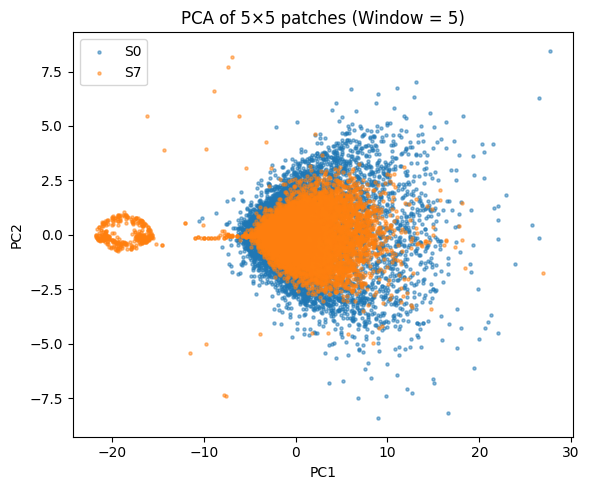

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

for lab in ['S0', 'S7']:
    idx = labels == lab
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        s=5,
        alpha=0.5,
        label=lab
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of 5×5 patches (Window = 5)')
plt.legend()
plt.tight_layout()
plt.savefig('pca_window5_S0_S7.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# Px, Py for S0
Px_S0 = data_S0['Px_list'].reshape(-1, 1)
Py_S0 = data_S0['Py_list'].reshape(-1, 1)

# Px, Py for S7
Px_S7 = data_S7['Px_list'].reshape(-1, 1)
Py_S7 = data_S7['Py_list'].reshape(-1, 1)

# Subsample using SAME indices as image PCA
Px_S0_sub = Px_S0[idx_S0]
Py_S0_sub = Py_S0[idx_S0]

Px_S7_sub = Px_S7[idx_S7]
Py_S7_sub = Py_S7[idx_S7]

Px_S0_sub.shape, Py_S0_sub.shape, Px_S7_sub.shape, Py_S7_sub.shape

((10000, 1), (10000, 1), (10000, 1), (10000, 1))

In [27]:
# Combine image + physics features
X_S0_hybrid = np.hstack([X_S0_sub, Px_S0_sub, Py_S0_sub])
X_S7_hybrid = np.hstack([X_S7_sub, Px_S7_sub, Py_S7_sub])

X_S0_hybrid.shape, X_S7_hybrid.shape

((10000, 27), (10000, 27))

In [29]:
X_hybrid_stack = np.vstack([X_S0_hybrid, X_S7_hybrid])
X_hybrid_stack.shape

(20000, 27)

In [30]:
from sklearn.decomposition import PCA

pca_hybrid = PCA(n_components=2)
X_pca_hybrid = pca_hybrid.fit_transform(X_hybrid_stack)

X_pca_hybrid.shape

(20000, 2)

In [31]:
pca_hybrid.explained_variance_ratio_

array([0.85617105, 0.0640775 ])

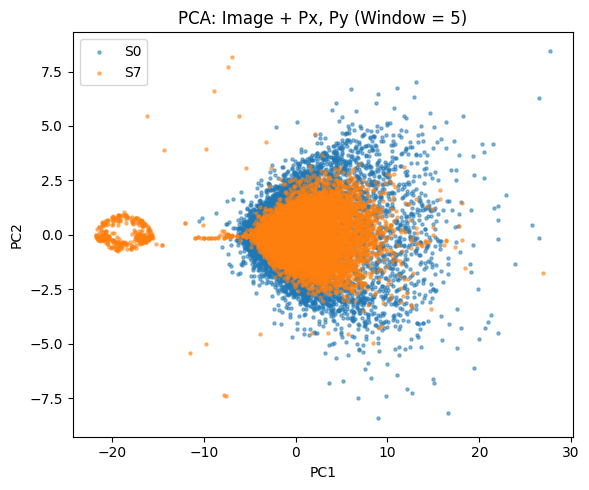

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

for lab in ['S0', 'S7']:
    idx = labels == lab
    plt.scatter(
        X_pca_hybrid[idx, 0],
        X_pca_hybrid[idx, 1],
        s=5,
        alpha=0.5,
        label=lab
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Image + Px, Py (Window = 5)')
plt.legend()
plt.tight_layout()
plt.savefig('pca_px_py_window5_S0_S7.png', dpi=300, bbox_inches='tight')
plt.show()

**From here..the code wasn't ran for this case**

In [ ]:
import joblib
# for each combination of window size and samarium concentration
# load data via joblib
data_dict = {}
composition_tags = [0, 7, 10, 13, 20]
for conc in composition_tags:
    for window in [10, 20, 40, 80]:
        data = joblib.load(f'/content/drive/MyDrive/2025_Hackathon/Data/Serenium_{conc}/Window_{window}/data.joblib')
        data_dict[f'conc{conc}_window{window}'] = data


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/2025_Hackathon/Data/Serenium_0/Window_10/data.joblib'

In [ ]:
window20_dataset = pd.DataFrame(columns=columns)
for i, conc in enumerate(composition_tags):
    data = data_dict[f'conc{conc}_window20']['X'].reshape((-1, 400))
    print(data.shape)
    block = pd.DataFrame(data, columns=[f'p{i}' for i in range(1, 401)])
    block['Px'] = data_dict[f'conc{conc}_window20']['Px_list']
    block['Py'] = data_dict[f'conc{conc}_window20']['Py_list']
    block['target'] = [conc_target_map[conc] for j in range(data.shape[0])]
    window20_dataset = pd.concat([window20_dataset, block], axis=0)
print(window20_dataset)
block = window20_dataset.sample(frac=1, replace=False, axis=0)
X = block[block.columns[:-1]]
print(X)
pc_kernel_window20 = PCA(n_components=None, whiten=True, svd_solver='full')
pc_kernel_window20.fit(X)
pc_data_window20 = pc_kernel_window20.transform(X)
window20_dataset.to_csv('/content/drive/MyDrive/2025_Hackathon/window20_dataset.csv', header=True, index=True, sep='\t')
joblib.dump(pc_kernel_window20, '/content/drive/MyDrive/2025_Hackathon/window20_pc_kernel.joblib', protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
pc_kernel
pc_kernel.explained_variance_ratio_
fig, ax = plt.subplots()
ax.plot(np.arange(1, pc_kernel.explained_variance_ratio_.shape[0]+1), pc_kernel.explained_variance_ratio_*100)
ax.set_xlim((0, 5))
ax.set_ylim((0, 100))
ax.set_ylabel('% explained variance')
ax.set_xlabel('pc')
ax.set_title('explained variance per pc')
plt.show()

In [ ]:
fig, ax = plt.subplots()
c = [target_conc_map[i] for i in block['target']]
art = ax.scatter(pc_data[:,0], pc_data[:,2], c=c, cmap='coolwarm')
fig.colorbar(art, cmap='coolwarm', label='Sm %')
#plt.colorbar()
ax.set_xlabel('pc 1')
ax.set_ylabel('pc 3')
ax.set_title('principal components for window size 10')
plt.show()

In [ ]:
fig, ax = plt.subplots()
c = [target_conc_map[i] for i in block['target']]
art = ax.scatter(pc_data[:,0], pc_data[:,1], c=c, cmap='coolwarm')
fig.colorbar(art, cmap='coolwarm', label='Sm %')
#plt.colorbar()
ax.set_xlabel('pc 1')
ax.set_ylabel('pc 2')
ax.set_title('principal components for window size 10')
plt.show()